Вам предлагается датасет (в формате csv) в котором содержатся события для игры в жанре Match-3 для когорты пользователей, регистрировавшихся с 21 мая 2054 года в течении 7 дней.
Для выполнения задания можно использовать любые известные вам инструменты.

Список событий

•EventType:”Install” - регистрация
    
•EventType:”Session” - старт сессии
    
•EventType:”InitPurchase” - инициация покупки (нажатие на кнопку купить в игре и вызов системного магазина)
    
•EventType:”Purchase” - совершение покупки
    
•EventType:”FtueStep” - прохождение воронки входа
    
Описание параметров событий

Для всех событий список полей всегда одинаков. По смыслу значение поля EventParam в зависимости от типа события отличается, остальные универсальны для всех типов событий

•EventTime - время совершения события в формате timestamp

•EventType - тип события

•Registered - дата регистрации игрока в формате timestamp

•UserUID - уникальный идентификатор игрока

•UserSource - источник инсталла (органика или траффик)

•EventParam - меняется в зависимости от EventType

o EventType:”Install” - в параметры присылается название устройства на котором запущена игра
    
o EventType:”Session” - в параметр указывается порядковый номер сессии
    
o EventType:”InitPurchase” - в параметре присылается стоимость покупки в USD
    
o EventType:”Purchase” - так же в параметре указывается стоимость товара в USD
    
o EventType:”FtueStep” - в качестве параметра указывается номер шага в воронке входа
    
 1 - регистрация игрока

 2 - первый матч 3-х фишек

 3 - второй матч 3-х фишек

 4 - свободный ход (не ограничен туториалом)

 5 - окно награды за уровень с кнопкой “далее”

 6 - матч из 4-х фишек

 7 - матч бонуса (уничтожить линию)


1. Составить мини-репорт по игре на основании имеющихся данных

2. Предложить новые события, которые позволят вам как аналитику знать об игре больше

3. Указать на слабые места в игре над которыми стоит поработать и предложить механики, которые могут решить найденные проблемы



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import statsmodels.api as sm
%matplotlib inline

In [2]:
plt.style.use('ggplot')                       # Красивые графики
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
df = pd.read_csv('/home/jupyter-v.startu-4/testdataset - 2000 users.csv')
df

,EventTime,EventType,Registered,UserUID,UserSource,EventParam
0,2662926335,Install,2662926335,814644039542,Organic,Samsung S20 Ultra 5G (990)
1,2662926335,Session,2662926335,814644039542,Organic,1
2,2662926353,FtueStep,2662926335,814644039542,Organic,1
3,2662926370,FtueStep,2662926335,814644039542,Organic,2
4,2662926394,FtueStep,2662926335,814644039542,Organic,3
...,...,...,...,...,...,...
127200,2668010588,Session,2663401987,790268650347,Organic,146
127201,2668014502,InitPurchase,2663401987,790268650347,Organic,10.99
127202,2668029868,Session,2663401987,790268650347,Organic,147
127203,2668033947,InitPurchase,2663401987,790268650347,Organic,12.99


In [5]:
df.dtypes

EventTime      int64
EventType     object
Registered     int64
UserUID        int64
UserSource    object
EventParam    object
dtype: object

In [6]:
#  Приведём время событий и регистраций к нашему часовому поясу

df.EventTime = df.EventTime + 10800
df.Registered = df.Registered + 10800

In [7]:
#  А теперь приведём те же поля к виду даты Год-месяц-день

df.EventTime = df.EventTime.apply(lambda x: datetime.datetime.fromtimestamp(x).date())
df.Registered = df.Registered.apply(lambda x: datetime.datetime.fromtimestamp(x).date())

In [8]:
df

,EventTime,EventType,Registered,UserUID,UserSource,EventParam
0,2054-05-21,Install,2054-05-21,814644039542,Organic,Samsung S20 Ultra 5G (990)
1,2054-05-21,Session,2054-05-21,814644039542,Organic,1
2,2054-05-21,FtueStep,2054-05-21,814644039542,Organic,1
3,2054-05-21,FtueStep,2054-05-21,814644039542,Organic,2
4,2054-05-21,FtueStep,2054-05-21,814644039542,Organic,3
...,...,...,...,...,...,...
127200,2054-07-18,Session,2054-05-26,790268650347,Organic,146
127201,2054-07-18,InitPurchase,2054-05-26,790268650347,Organic,10.99
127202,2054-07-19,Session,2054-05-26,790268650347,Organic,147
127203,2054-07-19,InitPurchase,2054-05-26,790268650347,Organic,12.99


In [9]:
#  Сначала посмотрим на инсталлы. Для этого создадим датафрейм, 
#  а затем построим график инсталлов по датам в разрезе источника(organic - traffic)

install = df.query('EventType == "Install"').groupby(['EventTime', 'UserSource'], as_index=False).agg({'UserUID': 'count'})


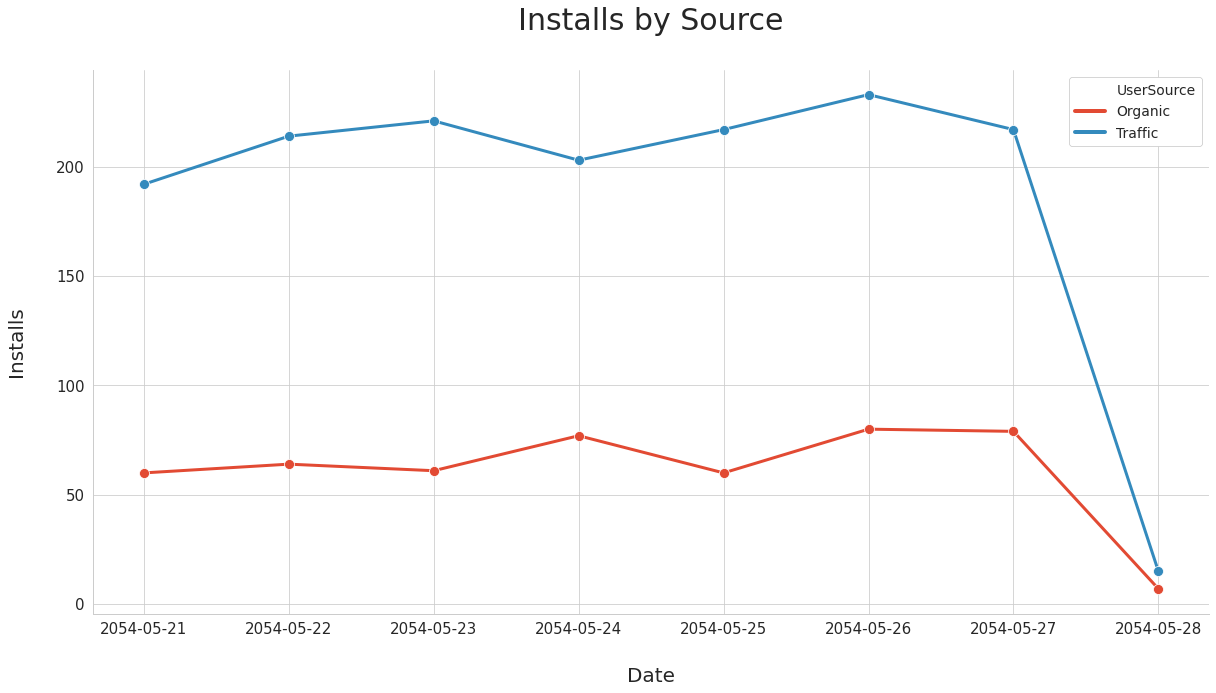

In [11]:
sns.lineplot(x='EventTime', y='UserUID', data=install, hue='UserSource', marker='o', linewidth=3)
plt.title('Installs by Source', fontsize=30, pad=40)
plt.xlabel('Date', fontsize=20, labelpad=30)
plt.ylabel('Installs', fontsize=20, labelpad=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
leg = plt.legend(facecolor='white', framealpha=1, labelspacing=0.5, fontsize=15)
leg_lines = leg.get_lines() 
leg_texts = leg.get_texts() 
plt.setp(leg_lines, linewidth=4) 
plt.setp(leg_texts, fontsize='x-large')
sns.set_style("whitegrid")
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)

sns.despine()

In [12]:
#  Создадим промежуточный датафрейм new и посчитаем интересующие 
#  нас метрики в разрезе источника (ARPU, ARPPU, Revenue, Converts to spenders).

new = df.query('EventType == "Purchase"')[['EventTime', 'EventType', 'UserSource', 'EventParam']]

In [13]:
new.head()

,EventTime,EventType,UserSource,EventParam
3430,2054-05-22,Purchase,Organic,3.99
3745,2054-05-22,Purchase,Organic,6.99
4513,2054-05-22,Purchase,Traffic,24.99
6170,2054-05-23,Purchase,Traffic,9.99
7117,2054-05-23,Purchase,Traffic,12.99


In [14]:
new.dtypes

EventTime     object
EventType     object
UserSource    object
EventParam    object
dtype: object

In [15]:
new.EventParam = new.EventParam.astype(float)

In [16]:
users_organic = df.query('UserSource == "Organic"').UserUID.nunique()
users_traffic = df.query('UserSource == "Traffic"').UserUID.nunique()

print(f'Organic users - {users_organic}')
print(f'Traffic users - {users_traffic}')

Organic users - 488
Traffic users - 1512


In [17]:
revenue_organic = new.query('UserSource == "Organic"')['EventParam'].sum().round(2)
revenue_traffic = new.query('UserSource == "Traffic"')['EventParam'].sum()

print(f'Revenue by Organic users - ${revenue_organic}')
print(f'Revenue by Traffic users - ${revenue_traffic}')

Revenue by Organic users - $286.43
Revenue by Traffic users - $5085.59


In [19]:
organic_paid = new.query('UserSource == "Organic"').EventParam.count()
traffic_paid = new.query('UserSource == "Traffic"').EventParam.count()

print(f'Organic paid users - {organic_paid}')
print(f'Traffic paid users - {traffic_paid}')

Organic paid users - 57
Traffic paid users - 241


In [20]:
arppu = round((revenue_organic + revenue_traffic) / (organic_paid + traffic_paid), 2)

print(f'ARPPU - ${arppu}')

ARPPU - $18.03


In [21]:
arppu_organic = new.query('UserSource == "Organic"')['EventParam'].mean().round(2)
arppu_traffic = new.query('UserSource == "Traffic"')['EventParam'].mean().round(2)

print(f'ARPPU by Organic users - ${arppu_organic}')
print(f'ARPPU by Traffic users - ${arppu_traffic}')

ARPPU by Organic users - $5.03
ARPPU by Traffic users - $21.1


In [22]:
arpu_organic = (revenue_organic / users_organic).round(2)
arpu_traffic = (revenue_traffic / users_traffic).round(2)

print(f'ARPU by Organic users - ${arpu_organic}')
print(f'ARPU by Traffic users - ${arpu_traffic}')

ARPU by Organic users - $0.59
ARPU by Traffic users - $3.36




Какие вывод можем сделать по метрикам:
Да, ARPPU выше вчетверо у платных пользователей($21,11 vs. $5,03), но мы примерно догадывались об этом. 
Тут гораздо важнее ARPU = $3,36 для этих пользователей. Отталкиваясь от этой цифры, мы можем оценивать результаты нашей рекламной кампании - ROI. Поскольку ROI = LTV / CPI (в качестве LTV(на платного пользователя) у нас выступает ARPU) Другими словами, если наш CPI приблизительно такой же или ещё выше, чем ARPU, то это работа в убыток(ROI < 1). Если же CPI меньше, то мы отбиваем затраты(ROI > 1), привлекая дополнительных пользователей (которых ещё надо удержать, но об этом дальше).




In [23]:
#  А тут мы посчитаем конверсию в платящих.

converts_to_spenders_organic = round((organic_paid / users_organic)*100, 2)
converts_to_spenders_traffic = round((traffic_paid / users_traffic)*100, 2)

print(f'Converts to spenders Organic - {converts_to_spenders_organic}%')
print(f'Converts to spenders Traffic - {converts_to_spenders_traffic}%')

Converts to spenders Organic - 11.68%
Converts to spenders Traffic - 15.94%


In [24]:
#  Посчитаем статзначимость преимущества конверсии traffic_users над organic_users.
#  Для этого проведём А/В-тест для пропорций.

s1 = 57
n1 = 488
s2 = 241
n2 = 1512

In [25]:
z, p_value = sm.stats.proportions_ztest([s1, s2], [n1, n2])

print('p_value =', round(p_value, 2))

p_value = 0.02


p_value < 0.05, делаем вывод, что пользователи, пришедшие из трафика, статистически
значимо чаще становятся платящими.

In [26]:
#  Теперь посмотрим на метрику DAU в разрезе источника.

dau = df.query('EventType != "Install"').groupby(['EventTime', 'UserSource'], as_index=False).agg({'UserUID': pd.Series.nunique})

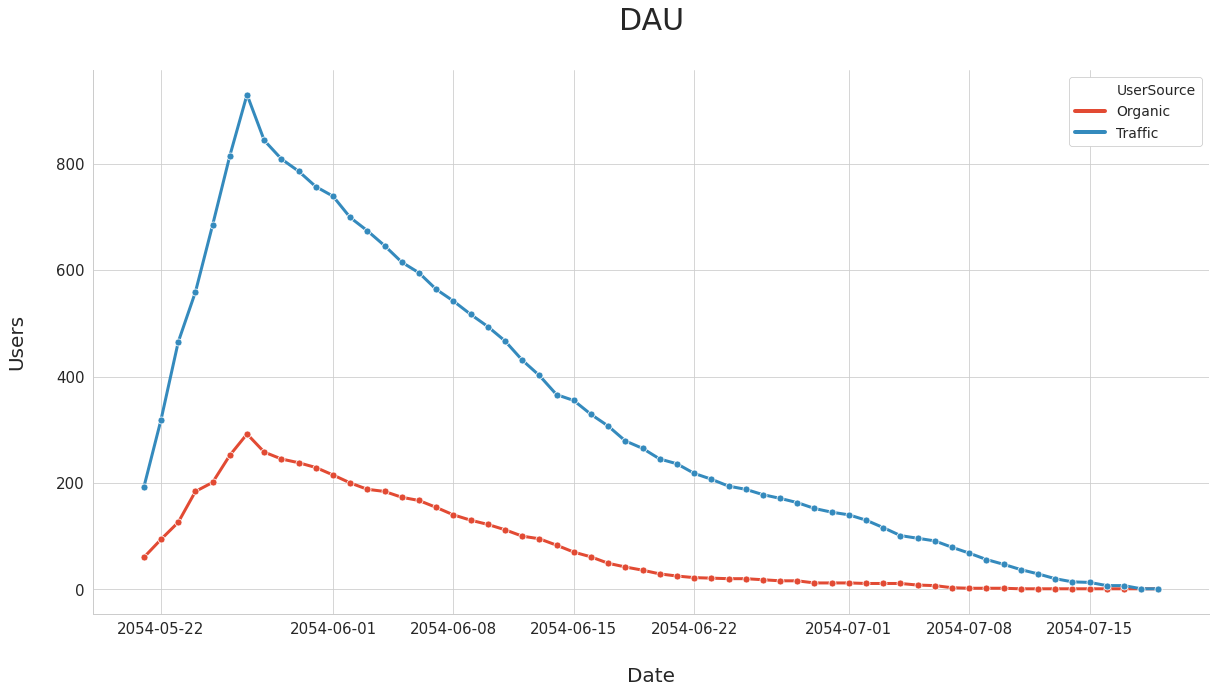

In [28]:
sns.lineplot(x='EventTime', y='UserUID', data=dau, hue='UserSource', marker='o', linewidth=3)
plt.title('DAU', fontsize=30, pad=40)
plt.xlabel('Date', fontsize=20, labelpad=30)
plt.ylabel('Users', fontsize=20, labelpad=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
leg = plt.legend(facecolor='white', framealpha=1, labelspacing=0.5, fontsize=15)
leg_lines = leg.get_lines() 
leg_texts = leg.get_texts() 
plt.setp(leg_lines, linewidth=4) 
plt.setp(leg_texts, fontsize='x-large')
sns.set_style("whitegrid")
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 7}                  
sns.set_context("paper", rc = paper_rc)

sns.despine()

Тут видно, что на протяжении первой недели, пока ежедневно прибавляются новые пользователи, 
график растёт, но как только приток заканчивается начинается падение, и к середине июля уходит в ноль.




А теперь посмотрим на одну из главных метрик - Retention. Напишем функцию
для расчёта и визуализации.

In [42]:
def retention(df, last_n_days=55, n_first_days=8, dates=[], zoom=105, rolling_chart=False, presentation_type='line'):
    
    
    """
       df - данные для расчёта
       last_n_days - количество последних дней, за которые мы посмотрим retention
       dates - можно указать определённые даты, чтобы не отвлекаться на все когорты
       zoom - увеличиваем масштаб графика, presentation_type = 'line'
       rolling_chart - можем "сгладить" график, для определения общей тенденции 
       presentation_type - 'line' (линейный график), 'style' (стильная табличка с когортами) 
    
    """
    
    
    #  Определим последний день в данных и день с которого начнём смотреть retention.
    
    last_day = df.reg_ts.max()
    first_day = last_day - pd.offsets.Day(last_n_days)
    
    #  Преобразуем данные и создадим Pivot table, где в индексах дни-когорты, а в колонках N_Day.
    
    cohorts = df\
                .query('reg_ts > @first_day')\
                .rename(columns={'reg_ts': 'Reg_Day_', 'auth_ts': 'Auth_Day'})
    cohorts['N_Day'] = (cohorts['Auth_Day'] - cohorts['Reg_Day_']).dt.days
    cohorts['Reg_Day'] = cohorts['Reg_Day_'].apply(lambda x: x.strftime('%Y-%m-%d'))
    cohorts = cohorts\
                        .groupby(['Reg_Day', 'Auth_Day', 'N_Day'], as_index=False)\
                        .agg({'uid': pd.Series.nunique})\
                        .rename(columns={'uid': 'Total_Users'})\
                        .pivot(index='Reg_Day', columns='N_Day', values='Total_Users')
 
    #  Определим размеры каждой когорты

    cohort_group_size = cohorts[0]
    
    #  Разделим количество пользователей в каждый день для каждой когорты на размер когорты.
    
    user_retention = cohorts.divide(cohort_group_size, axis=0)
    
    #  Создадим таблицу для представления в виде линейного графика, транспонировав предыдущую таблицу.
    
    users = user_retention.T
    
    
    #  Напишем функцию для стильной таблицы.
    
    
    def make_style(df):
        return (df
                    .style
                    .set_caption('User retention by cohort')
                    .set_table_styles([{
                                    'selector': 'caption',
                                    'props': [
                                        ('color', 'black'),
                                        ('font-size', '25px'),
                                        ('text-align','center')
                                    ]
                                }])       # добавляем подпись
                    .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
                    .highlight_null('white')  # делаем белый фон для значений NaN
                    .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
    
    
    if presentation_type == 'line':
        
        if dates:
            try:
                if rolling_chart:
                    ax = users[dates].rolling(4).mean().plot(linewidth=2, markersize=4, marker='o')
                else:
                    ax = users[dates].plot(linewidth=2, markersize=6, marker='o')
            except KeyError:
                return f'Не все выбранные даты входят в наблюдаемый интервал времени {first_day.date()} - {last_day}. Пожалуйста, задайте даты-когорты снова.'
        else:
            if rolling_chart:
                ax = users.rolling(4).mean().plot(linewidth=2, markersize=4, marker='o')
            else:
                ax = users.plot(linewidth=2, markersize=4, marker='o')

                
        
        #  Дополнительная визуализация
        
        plt.title('Cohorts: User Retention', fontsize=30, pad=40)
        
        plt.xticks(np.arange(0, last_n_days, 1), fontsize=12) # разбивка оси X
        plt.xlabel('N_Day', fontsize=20, labelpad=30)
        plt.xlim(left=-1) #ось X
        
        plt.yticks(np.arange(0, 1.1, 0.1), fontsize=15)
        plt.ylabel('Cohort Retention', fontsize=20, labelpad=30)
        plt.ylim(0, zoom / 100)
        
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
        ax.grid(which='minor',
                color = 'black',
                linewidth=0.2,
                linestyle = '--')
        ax.tick_params(axis='both', which = 'both', color='white')
        
        plt.legend(facecolor='white', framealpha=1, labelspacing=0.5, fontsize=11)
        
        ax.set_facecolor('white')
        ax.grid(which='major',color='black', linewidth=0.5, linestyle='--')
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: '{:,g}%'.format(y*100)))
        sns.despine()
    elif presentation_type == 'style':
        if dates:
            try:
                
                return make_style(user_retention.loc[dates])
          
            except KeyError:
                
                return f'Не все выбранные даты входят в наблюдаемый интервал времени {first_day.date()} - {last_day}. Пожалуйста, задайте даты-когорты снова.'
        else:
            return make_style(user_retention.iloc[:,n_first_days-2:n_first_days-1])
  
    

In [30]:
full_data = df[['EventTime', 'UserUID', 'Registered']]\
                .rename(columns={'EventTime': 'auth_ts', 'UserUID': 'uid', 'Registered': 'reg_ts'})

In [40]:
#  Посмотрим на "стильную" таблицу Retention за первые 7 дней. 

retention(full_data, presentation_type='style')

N_Day,0,1,2,3,4,5,6,7
Reg_Day,,,,,,,,
2054-05-21,100.00%,53.57%,51.19%,48.02%,46.03%,45.24%,42.86%,39.29%
2054-05-22,100.00%,64.75%,61.87%,60.43%,57.91%,56.47%,55.04%,51.80%
2054-05-23,100.00%,60.28%,58.87%,57.80%,56.38%,54.96%,53.19%,52.48%
2054-05-24,100.00%,56.79%,55.36%,53.57%,51.07%,50.00%,49.29%,47.14%
2054-05-25,100.00%,58.12%,55.96%,55.23%,53.79%,51.62%,48.74%,47.29%
2054-05-26,100.00%,62.94%,61.66%,59.42%,57.19%,56.23%,54.95%,52.40%
2054-05-27,100.00%,62.16%,58.78%,56.76%,53.72%,51.35%,48.31%,46.96%
2054-05-28,100.00%,63.64%,59.09%,50.00%,50.00%,50.00%,50.00%,50.00%


In [43]:
#  И на Retention 28-ого дня

retention(full_data, n_first_days=30, presentation_type='style')

N_Day,28
Reg_Day,
2054-05-21,9.13%
2054-05-22,16.91%
2054-05-23,14.89%
2054-05-24,11.43%
2054-05-25,9.75%
2054-05-26,12.14%
2054-05-27,12.84%
2054-05-28,4.55%



Тут мы посмотрим на классический Retention 1-ого, 7-ого и 28-ого дня. 

--   Retention D1 характеризует интересность геймплея нашей игры. 
     В течение первого дня большинство пользователей сможет оценить 
     только основной геймплей. И тут мы видим, что всё хорошо, 
     Retention в среднем на уровне 60%.
    
--   Retention D7 характеризует core loop нашей игры и даёт первичное представление о том, 
     насколько пользователей увлекает мета-игра нашего продукта(если она вообще есть). 
     И на 7-ой день мы видим удивительно высокий Retention, который для игр Match-3 в 
     среднем составляет не более 22%. Похоже, это успех? 

--   Retention D28 характеризует глубину геймплея и мета-игры. 
     Авторитетные аналитики считают, что для Match-3 этот показатель 
     в среднем составляет 9-10%. Показатели D28 некоторых наших когорт 
     значительно превышают данный процент, что позволяет говорить об 
     определённом успехе в плане удержания клиентов.


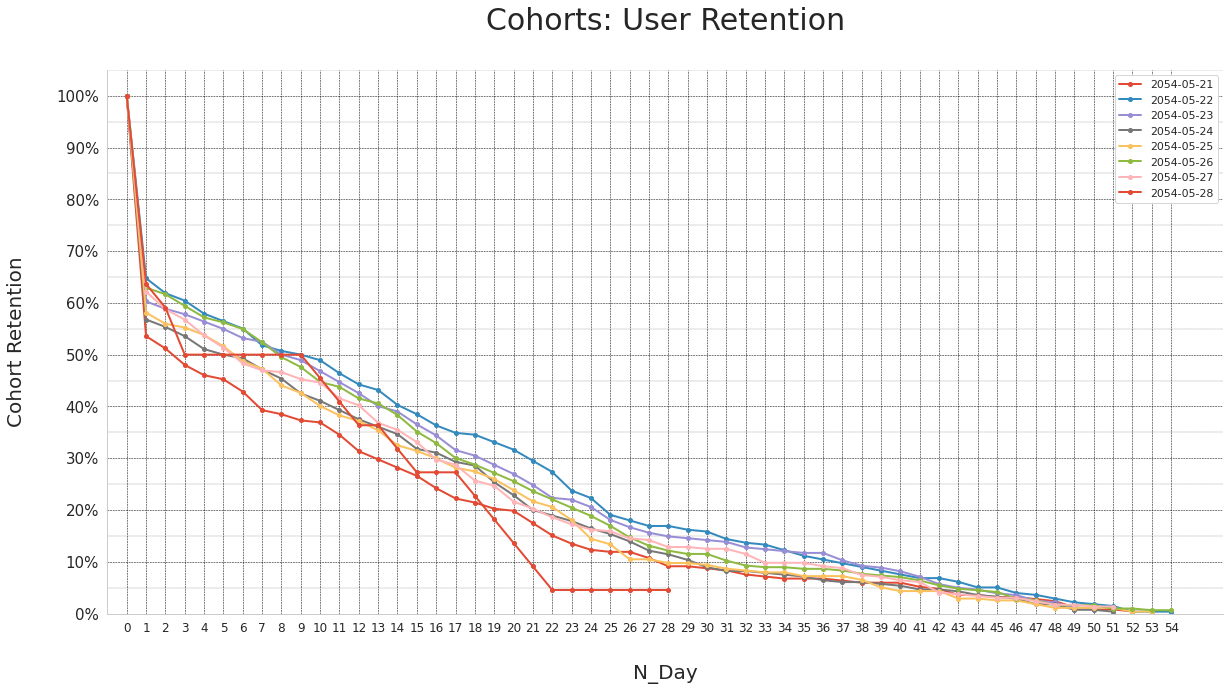

In [41]:
#  Также можем посмотреть на Retention за всё время в виде linechart.

retention(full_data)


А вот Long Retention – это проблема нашей игры. Его просто нет, он практически равен 0. Почему это важно:
Как показывает практика, т.е. опыт успешных игр, кривая Retention после 30 дня должна выходить на плато на адекватном уровне(5-7%), и идти параллельно оси X. Это означает, что мы преобразуем новых пользователей в регулярных лояльных игроков. А значит, есть фундамент для создания качественной монетизации и вывода игрового продукта на широкую аудиторию через платные каналы привлечения пользователей. В играх с хорошим долгосрочным Retention LTV пользователей обычно продолжает расти на протяжении долгого времени, обеспечивая такие значения LTV, которые позволяют увеличить объёмы платного привлечения пользователей.






А теперь посмотрим на данные с другой стороны и расчитаем нужные метрики



In [48]:
ff = pd.read_csv('/home/jupyter-v.startu-4/testdataset - 2000 users.csv')
ff

,EventTime,EventType,Registered,UserUID,UserSource,EventParam
0,2662926335,Install,2662926335,814644039542,Organic,Samsung S20 Ultra 5G (990)
1,2662926335,Session,2662926335,814644039542,Organic,1
2,2662926353,FtueStep,2662926335,814644039542,Organic,1
3,2662926370,FtueStep,2662926335,814644039542,Organic,2
4,2662926394,FtueStep,2662926335,814644039542,Organic,3
...,...,...,...,...,...,...
127200,2668010588,Session,2663401987,790268650347,Organic,146
127201,2668014502,InitPurchase,2663401987,790268650347,Organic,10.99
127202,2668029868,Session,2663401987,790268650347,Organic,147
127203,2668033947,InitPurchase,2663401987,790268650347,Organic,12.99


In [49]:
ff.EventTime = ff.EventTime + 10800
ff.Registered = ff.Registered + 10800

In [50]:
ff.EventTime = ff.EventTime.apply(lambda x: datetime.datetime.fromtimestamp(x).date())

In [51]:
ff.EventTime = pd.to_datetime(ff.EventTime)
ff['month'] = ff.EventTime.dt.month

In [52]:
#  Рассчитаем MAU и построим график для Sticky factor = DAU/MAU.

mau = ff.query('EventType != "Install"').groupby(['month', 'UserSource'], as_index=False).agg({'UserUID': pd.Series.nunique}).rename(columns={'UserUID': 'MAU'})

In [53]:
mau

,month,UserSource,MAU
0,5,Organic,488
1,5,Traffic,1512
2,6,Organic,215
3,6,Traffic,739
4,7,Organic,12
5,7,Traffic,140


In [54]:
dau_2 = ff.query('EventType != "Install"').groupby(['EventTime', 'UserSource'], as_index=False).agg({'UserUID': pd.Series.nunique}).rename(columns={'UserUID': 'DAU'})

In [55]:
dau_2

,EventTime,UserSource,DAU
0,2054-05-21,Organic,60
1,2054-05-21,Traffic,192
2,2054-05-22,Organic,94
3,2054-05-22,Traffic,319
4,2054-05-23,Organic,126
...,...,...,...
115,2054-07-17,Traffic,7
116,2054-07-18,Organic,1
117,2054-07-18,Traffic,1
118,2054-07-19,Organic,1


In [56]:
dau_2.EventTime = pd.to_datetime(dau_2.EventTime)
dau_2['month'] = dau_2.EventTime.dt.month

In [57]:
dau_2

,EventTime,UserSource,DAU,month
0,2054-05-21,Organic,60,5
1,2054-05-21,Traffic,192,5
2,2054-05-22,Organic,94,5
3,2054-05-22,Traffic,319,5
4,2054-05-23,Organic,126,5
...,...,...,...,...
115,2054-07-17,Traffic,7,7
116,2054-07-18,Organic,1,7
117,2054-07-18,Traffic,1,7
118,2054-07-19,Organic,1,7


In [58]:
sticky_factor = dau_2.merge(mau, on=['month', 'UserSource'])

In [59]:
sticky_factor

,EventTime,UserSource,DAU,month,MAU
0,2054-05-21,Organic,60,5,488
1,2054-05-22,Organic,94,5,488
2,2054-05-23,Organic,126,5,488
3,2054-05-24,Organic,184,5,488
4,2054-05-25,Organic,201,5,488
...,...,...,...,...,...
115,2054-07-15,Traffic,13,7,140
116,2054-07-16,Traffic,7,7,140
117,2054-07-17,Traffic,7,7,140
118,2054-07-18,Traffic,1,7,140


In [60]:
sticky_factor['sticky_factor'] = round((sticky_factor.DAU / sticky_factor.MAU) * 100, 2)

In [61]:
sticky_factor.head()

,EventTime,UserSource,DAU,month,MAU,sticky_factor
0,2054-05-21,Organic,60,5,488,12.30
1,2054-05-22,Organic,94,5,488,19.26
2,2054-05-23,Organic,126,5,488,25.82
3,2054-05-24,Organic,184,5,488,37.70
4,2054-05-25,Organic,201,5,488,41.19


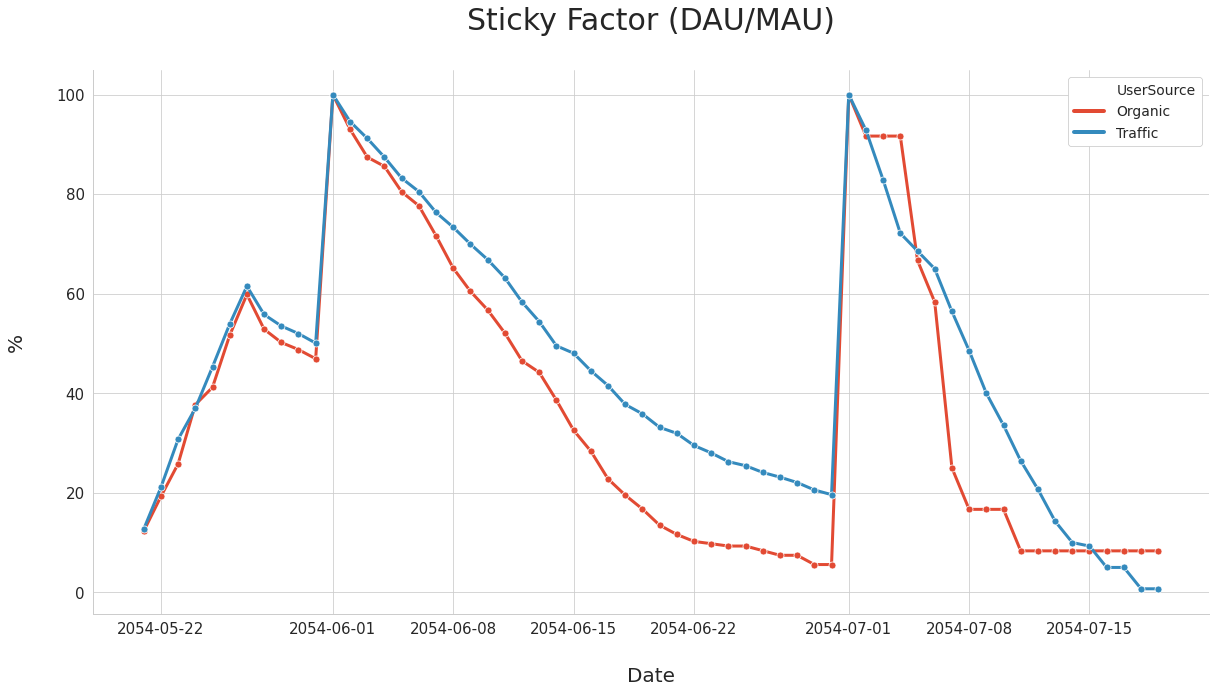

In [62]:
sns.lineplot(x='EventTime', y='sticky_factor', data=sticky_factor, hue='UserSource', marker='o', linewidth=3)
plt.title('Sticky Factor (DAU/MAU)', fontsize=30, pad=40)
plt.xlabel('Date', fontsize=20, labelpad=30)
plt.ylabel('%', fontsize=20, labelpad=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
leg = plt.legend(facecolor='white', framealpha=1, labelspacing=0.5, fontsize=15)
leg_lines = leg.get_lines() 
leg_texts = leg.get_texts() 
plt.setp(leg_lines, linewidth=4) 
plt.setp(leg_texts, fontsize='x-large')
sns.set_style("whitegrid")
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 7}                  
sns.set_context("paper", rc = paper_rc)

sns.despine()



Мы можем также посмотреть на так называемый «фактор прилипчивости». Он показывает с какой вероятностью каждый новый игрок может стать ежедневно активным пользователем. А ежедневные пользователи – это  те, кто наиболее вероятно будет тратить деньги на нашу игру. Тут мы видим, что наши платные пользователи более прилипчивы.




In [63]:
df

,EventTime,EventType,Registered,UserUID,UserSource,EventParam
0,2054-05-21,Install,2054-05-21,814644039542,Organic,Samsung S20 Ultra 5G (990)
1,2054-05-21,Session,2054-05-21,814644039542,Organic,1
2,2054-05-21,FtueStep,2054-05-21,814644039542,Organic,1
3,2054-05-21,FtueStep,2054-05-21,814644039542,Organic,2
4,2054-05-21,FtueStep,2054-05-21,814644039542,Organic,3
...,...,...,...,...,...,...
127200,2054-07-18,Session,2054-05-26,790268650347,Organic,146
127201,2054-07-18,InitPurchase,2054-05-26,790268650347,Organic,10.99
127202,2054-07-19,Session,2054-05-26,790268650347,Organic,147
127203,2054-07-19,InitPurchase,2054-05-26,790268650347,Organic,12.99


In [64]:
#  Пришло время посомтреть на метрики в разрезе платформы.

platform = df.query('EventType == "Install"')

In [65]:
def plat(col):
    name = col.split()[0]
    if name == 'iPhone':
        return 'iOS'
    else:
        return 'android'

In [66]:
platform['platform'] = platform.EventParam.apply(plat)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
platform

,EventTime,EventType,Registered,UserUID,UserSource,EventParam,platform
0,2054-05-21,Install,2054-05-21,814644039542,Organic,Samsung S20 Ultra 5G (990),android
12,2054-05-21,Install,2054-05-21,640029705176,Organic,Redmi K20 Pro Premium,android
21,2054-05-21,Install,2054-05-21,784084169975,Traffic,iPhone 8 Plus,iOS
33,2054-05-21,Install,2054-05-21,520215800587,Organic,OnePlus 7 Pro,android
43,2054-05-21,Install,2054-05-21,116122907011,Traffic,Samsung Note 9 (9810),android
...,...,...,...,...,...,...,...
36100,2054-05-28,Install,2054-05-28,729405839498,Traffic,Mi 9,android
36108,2054-05-28,Install,2054-05-28,632354576694,Organic,Mi 9T Pro,android
36147,2054-05-28,Install,2054-05-28,408024518105,Traffic,Mi 9T Pro,android
36182,2054-05-28,Install,2054-05-28,279056728015,Organic,iPhone 11 Pro Max,iOS


In [68]:
platform.groupby(['UserSource', 'platform'], as_index=False).agg({'UserUID': 'count'})

,UserSource,platform,UserUID
0,Organic,android,411
1,Organic,iOS,77
2,Traffic,android,1265
3,Traffic,iOS,247



Тут видно разделение пользователей по виду источника и платформе. Пользователей android значительно больше. Понятно, что android более популярен, но с учётом следующих расчётов ясно, что нужно уделить владельцам iPhone больше внимания при планировании акций привлечения, ведь они более платёжеспособны.



In [69]:
full = df.merge(platform[['UserUID', 'platform']], on='UserUID')

In [70]:
full

,EventTime,EventType,Registered,UserUID,UserSource,EventParam,platform
0,2054-05-21,Install,2054-05-21,814644039542,Organic,Samsung S20 Ultra 5G (990),android
1,2054-05-21,Session,2054-05-21,814644039542,Organic,1,android
2,2054-05-21,FtueStep,2054-05-21,814644039542,Organic,1,android
3,2054-05-21,FtueStep,2054-05-21,814644039542,Organic,2,android
4,2054-05-21,FtueStep,2054-05-21,814644039542,Organic,3,android
...,...,...,...,...,...,...,...
127200,2054-05-28,FtueStep,2054-05-28,768410253147,Traffic,3,android
127201,2054-05-28,FtueStep,2054-05-28,768410253147,Traffic,4,android
127202,2054-05-28,FtueStep,2054-05-28,768410253147,Traffic,5,android
127203,2054-05-28,FtueStep,2054-05-28,768410253147,Traffic,6,android


In [71]:
dd = full.query('EventType == "Purchase"')

In [72]:
dd

,EventTime,EventType,Registered,UserUID,UserSource,EventParam,platform
117,2054-06-12,Purchase,2054-05-21,814644039542,Organic,6.99,android
376,2054-06-15,Purchase,2054-05-21,784084169975,Traffic,12.99,iOS
574,2054-05-24,Purchase,2054-05-21,159287429633,Traffic,4.99,iOS
977,2054-05-28,Purchase,2054-05-21,362777969593,Traffic,9.99,android
1058,2054-06-21,Purchase,2054-05-21,362777969593,Traffic,24.99,android
...,...,...,...,...,...,...,...
126141,2054-06-12,Purchase,2054-05-28,215250676576,Traffic,4.99,iOS
126143,2054-06-12,Purchase,2054-05-28,215250676576,Traffic,10.99,iOS
126432,2054-05-29,Purchase,2054-05-28,408236841063,Organic,4.99,android
126434,2054-05-29,Purchase,2054-05-28,408236841063,Organic,6.99,android


In [73]:
dd.EventParam = dd.EventParam.astype(float)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [74]:
dd.groupby(['UserSource', 'platform'], as_index=False).EventParam.mean().round(2)

,UserSource,platform,EventParam
0,Organic,android,5.16
1,Organic,iOS,4.39
2,Traffic,android,19.76
3,Traffic,iOS,26.95




Тут мы видим, что органические владельцы iPhone тратят в среднем даже меньше, чем пользователя android. Ситуация же для платных пользователей другая: пользователи iOS платят ощутимо больше, и этот факт стоит учитывать при планировании рекламных кампаний по привлечению.







Теперь посмотрим, нет ли у пользователей проблем с прохождением туториала.




No handles with labels found to put in legend.


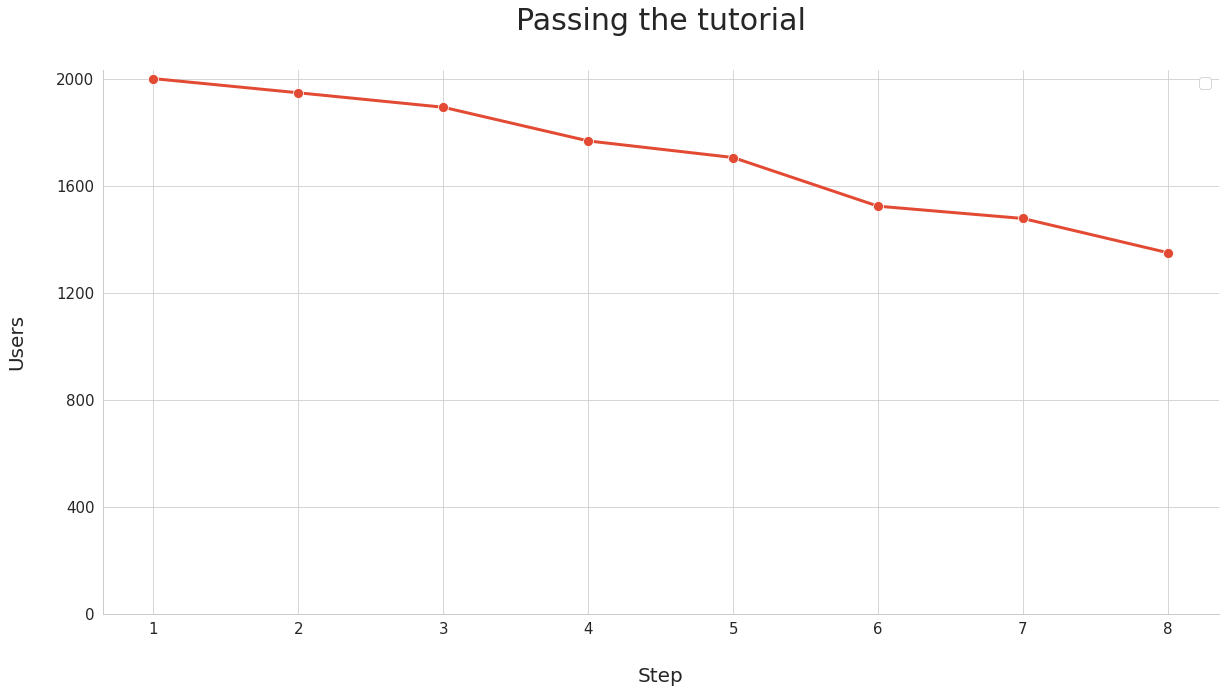

In [76]:

sns.lineplot(data=full.query('EventType == "FtueStep"').EventParam.value_counts(), marker='o', linewidth=3)
plt.title('Passing the tutorial', fontsize=30, pad=40)
plt.xlabel('Step', fontsize=20, labelpad=30)
plt.ylabel('Users', fontsize=20, labelpad=30)
plt.xticks(fontsize=15)
plt.yticks(np.arange(0, 2200, 400), fontsize=15)
leg = plt.legend(facecolor='white', framealpha=1, labelspacing=0.5, fontsize=15)
leg_lines = leg.get_lines() 
leg_texts = leg.get_texts() 
plt.setp(leg_lines, linewidth=4) 
plt.setp(leg_texts, fontsize='x-large')
sns.set_style("whitegrid")
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)

sns.despine()



Для поиска проблем с механиками можем посмотреть на распределение пользователей по шагам прохождения туториала. Фактически, туториал - это первое знакомство пользователя с геймплеем и основными механиками нашей игры. Из графика видно, что примерно 30% инсталлов превращаются в Churn Rate не доходя даже первого уровня.




In [79]:
#  Посчитаем долю пользователей в процентах, которые начинают платить с первой же сессии.

round(df.query('Registered == EventTime and EventType == "Purchase"').UserUID.count() / df.UserUID.nunique() * 100, 4)

0.45

In [81]:
#  А сколько пользователей заходило в магазин в первую же сессию?

df.query('Registered == EventTime and EventType == "InitPurchase"')

,EventTime,EventType,Registered,UserUID,UserSource,EventParam
10,2054-05-21,InitPurchase,2054-05-21,814644039542,Organic,6.99
11,2054-05-21,InitPurchase,2054-05-21,814644039542,Organic,10.99
31,2054-05-21,InitPurchase,2054-05-21,784084169975,Traffic,9.99
32,2054-05-21,InitPurchase,2054-05-21,784084169975,Traffic,12.99
51,2054-05-21,InitPurchase,2054-05-21,116122907011,Traffic,15.99
...,...,...,...,...,...,...
41173,2054-05-28,InitPurchase,2054-05-28,946229002117,Traffic,5.99
41319,2054-05-28,InitPurchase,2054-05-28,946229002117,Traffic,15.99
41390,2054-05-28,InitPurchase,2054-05-28,632354576694,Organic,0.99
41392,2054-05-28,InitPurchase,2054-05-28,158012695443,Traffic,10.99


Выводы:
    
1.    Основываясь на данных одной недели можем сказать, что как-то нехорошо проводится продвижение нашей игры, потому как платных пользователей в 3 раза больше, чем органических, что само по себе странно, потому что любые продвижения помимо рекламных кампаний притягивают органики значительно больше, нежели трафика.


2.    Мы не знаем, к сожалению, CPI, чтобы сказать точно, но можно прикинуть примерно, что ARPU платных пользователей вполне нормальный, с учётом того, что CPI_iOS в районе $2, а CPI_android в районе 1$(данные практически с потолка, потому что речь о США в доCOVIDное время, где CPI_android = $1,9; CPI_iOS = $1,6, но в России всё немного наоборот, плюс дешевле в 2-3 раза, но поскольку достоверно неизвестна география данных, да и год 2054, а пользователей в таких случаях обязательно нужно сегментировать по региону, будем считать $2 и $1 и радоваться нашему ARPU).


3.    Говоря об удержании, можем отметить очень хороший Retention D1, D7 и D28, но при этом задуматься, почему Retention ≈ D60 практически нулевой, т.е. мы фактически теряем всех пользователей. Можно говорить о том, что в нашей игре присутствуют какие-то неявные, но глубокие и стратегические недостатки. Возможно, отсутствует мета-игра, либо она минимальна(ограниченные возможности прокачки небольшого количества персонажей или других составляющих), и пользовательского интереса не хватает надолго. Возможно, мы делаем слишком большие перерывы между выкатываниями интересных обновлений и фичей, поэтому пользователи банально не дожидаются, а в условиях сегодняшней конкуренции, найти замену игре очень просто.


4.    Также мы рассмотрели «фактор прилипчивости». Он перекликается с Retention и очень неплох, т.е. мы затягиваем пользователей в нашу игру, жаль, что ненадолго.


5.    Ещё одной проблемой представляется наш туториал, проходя который отваливаются 30% пользователей. С учётом хорошего Retention в первые дни грешить на геймплей мы так сразу не можем, но можем в будущем попробовать аккуратно внести изменения и оценить результат, проведя A/B-тест. Также я предложил бы попробовать сократить туториал с 8 шагов до 4. И с учётом того, что самый заметный отток происходит после 3(2-ой матч 3-х фишек), 5(кнопка «Далее» после свободного хода) и 7 шага(матч бонуса, уничтожить линию), я предложил бы убрать шаги 3 и 4, пересмотреть геймплей 7 шага (уничтожение линии, возможно, это происходит как-то не слишком ярко и круто). Ну и для более быстрого прохода туториала подсветить в каждом уровне фишки, которые необходимо сдвинуть, чтобы получить матч(если это ещё не сделано).


6.    Также мы увидели Spenders Convert During 1st Session = 0,45%. Очень немногие готовы платить с первой же сессии. Можно как-то изменить механики, чтобы вызвать потребность и интерес в оплате. И совершенно точно нужно изменить переход в магазин(InitPurchase) - 81,55% (1631 человек) пользователей нажали на эту кнопку в первый же день, а купили всего 9 человек, так что скорее всего это какое-то всплывающее окно, на которое почти наверняка нехотя нажимаешь, но не хочется, а это, наверное, раздражает.


7.    Теперь о событиях. Хотелось бы логировать больше событий: 
    
    а) время не только начала сессии, но и окончания, чтобы можно было отслеживать среднюю длительность сессии и среднюю длительность первой сессии. Это очень интересные метрики, которые позволят взглянуть на пользователей иначе и понять, как надолго увлекает наша игра и наш геймплей(длительность первой сессии);
    
    б) также необходимо логировать все данные по каждому уровню, чтобы иметь полное представление о том, как пользователи проходят уровни. Это позволит в дальнейшем корректировать механики и сложность уровней, оставляя интерес у пользователей. Очень может быть, что все наши пользователи отвалились спустя 2 месяца по причине какого-то сложного уровня, или серии сложных уровней(особенно если прохождение каждого уровня ограничено временем).
    
    в) ещё очень хотелось бы знать об источниках платных установок все подробности, чтобы в будущем оптимизировать расходы на рекламу и перенаправить средства в самые богатые на инсталлы источники.
    
    г) также хотелось бы иметь информацию о мета-игре(прогресс) каждого пользователя, чтобы можно было работать над улучшениями самой мета-игры, добавляя новые фичи и элементы, а так же для подробной сегментации пользователей с целью выкатывания новых обновлений  для определённых сегментов, которые наиболее интересны для нас в плане получения прибыли.
